# import libraries

Before we can start, you need to install the necessary software. First, make sure you have Python, either version 2.x or 3.x (they are slightly incompatible.) If you have both versions available on your system, we recommend version 3.x. You also need OMNeT++ version 5.2 or later.

We will heavily rely on three Python packages: NumPy, Pandas, and Matplotlib. There are also optional packages that will be useful for certain tasks: SciPy, PivotTable.js. We also recommend that you install IPython and Jupyter, because they let you work much more comfortably than the bare Python shell.

these packages can be installed with pip, 
- pip install numpy pandas matplotlib

In this tutorial, we'll work with the contents of the results imported from OMNeT++. The resutls directory available on Moodle contains result files produced by the OMNeT++ simulations. Note that when you will run the simulation as part of your project the output results will be differnt. 

As the first step, we use OMNeT++'s scavetool to convert scalar files to CSV. Run the following commands in the terminal (replace ~/omnetpp with the location of your OMNeT++ installation:

- cd ~/omnetpp/samples/resultfiles/aloha
- scavetool x *.sca -o aloha.csv

When the export is done, you can start Jupyter server with the following command:
- jupyter notebook

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#only needed for Jupyter
%matplotlib inline 

# import the contents of CSV file into a Pandas data frame

In [26]:
results = pd.read_csv('Sample_data.csv') #read_csv() function: import csv file into a data frame

# Veiw the structure of the dataFrame

You can view the contents of the data frame by simply entering the name. Alternatively, you can use the head() method of the data frame to view just the first few lines.

In [137]:
results.head() #view the contents of the data frame: just few line
#missing values are represented with NaNr

,type,sendTime,sender,senderPseudo,messageID,x_pos,y_pos,z_pos,x_pos_noise,y_pos_noise,...,z_acl,x_acl_noise,y_acl_noise,z_acl_noise,x_hed,y_hed,z_hed,hed_noise,hed_noise.1,hed_noise.2
0,4,25202.602763,9,1092,4184,265.244033,50.634354,0.0,3.656680,3.616978,...,0.0,0.000946,0.000946,0.0,-0.102790,0.994703,0.0,7.994259,7.376133,0.0
1,4,25203.602763,9,1092,4194,264.885167,52.588125,0.0,3.508501,3.429000,...,0.0,0.000071,0.000690,0.0,-0.102790,0.994703,0.0,8.174877,5.941998,0.0
2,4,25204.602763,9,1092,4204,264.629254,56.495061,0.0,3.469352,3.576584,...,0.0,0.000211,0.002045,0.0,-0.107971,0.994154,0.0,8.360550,4.900224,0.0
3,4,25205.602763,9,1092,4214,263.961141,62.377989,0.0,3.590258,3.673011,...,0.0,0.000212,0.001824,0.0,-0.129025,0.991641,0.0,8.667087,4.035659,0.0
4,4,25206.602763,9,1092,4224,265.764984,70.670903,0.0,3.633979,3.377536,...,0.0,0.000341,0.001836,0.0,-0.152295,0.988335,0.0,9.089413,3.294954,0.0


You can see that the structure of the data frame, i.e. rows and columns, directly corresponds to the contents of the CSV file. Column names have been taken from the first line of the CSV file.

In [28]:
results.tail() #last few line

,type,sendTime,sender,senderPseudo,messageID,x_pos,y_pos,z_pos,x_pos_noise,y_pos_noise,...,z_acl,x_acl_noise,y_acl_noise,z_acl_noise,x_hed,y_hed,z_hed,hed_noise,hed_noise.1,hed_noise.2
196773,4,28955.499913,10989,10109892,30506282,622.657380,338.808602,0.0,4.013036,4.089348,...,0.0,0.000003,9.470141e-07,0.0,-0.980196,-0.198028,0.0,15.010914,6.500080,0.0
196774,4,28956.499913,10989,10109892,30520105,609.846311,334.488775,0.0,3.906377,3.950460,...,0.0,0.000008,2.845699e-06,0.0,-0.980196,-0.198028,0.0,14.961632,6.492785,0.0
196775,4,28957.499913,10989,10109892,30529108,597.055046,330.186404,0.0,3.988000,4.138586,...,0.0,0.000006,1.936719e-06,0.0,-0.980196,-0.198028,0.0,14.980396,6.495564,0.0
196776,4,28958.499913,10989,10109892,30542269,586.059696,326.461412,0.0,4.197563,3.824349,...,0.0,0.000002,7.414492e-07,0.0,-0.980196,-0.198028,0.0,10.374983,5.729841,0.0
196777,4,28959.499913,10989,10109892,30551396,579.239766,324.149845,0.0,4.012787,3.743926,...,0.0,0.000634,2.163360e-04,0.0,-0.979055,-0.203594,0.0,6.788436,4.957246,0.0


The complementary tail() method shows the last few lines. There is also an iloc method that we use at places in this tutorial to show rows from the middle of the data frame. It accepts a range:

In [62]:
# Print rows from the middle of the dataFrame, as it accept a range
results.iloc[12:17] #  show rows from the middle of the data frame

,type,sendTime,sender,senderPseudo,messageID,x_pos,y_pos,z_pos,x_pos_noise,y_pos_noise,...,z_acl,x_acl_noise,y_acl_noise,z_acl_noise,x_hed,y_hed,z_hed,hed_noise,hed_noise.1,hed_noise.2
12,4,25209.812169,21,10212,17164,152.828755,902.586505,0.0,3.317255,3.348601,...,0.0,0.000064,0.000869,0.0,0.071785,-0.997420,0.0,17.497600,23.916289,0.0
13,4,25209.891773,15,10152,17187,122.046546,1086.429849,0.0,4.325058,4.403194,...,0.0,0.000461,0.004917,0.0,0.078451,-0.996918,0.0,15.744606,24.856974,0.0
14,4,25209.925597,27,10272,17204,113.211027,891.558134,0.0,4.640201,4.625915,...,0.0,0.000073,0.000006,0.0,0.997140,0.075578,0.0,10.170502,13.061297,0.0
15,4,25210.602763,9,1092,21525,260.954087,120.507590,0.0,3.616370,3.358991,...,0.0,0.000040,0.001668,0.0,-0.145267,0.989393,0.0,10.042248,1.895298,0.0
16,4,25210.758616,33,10332,21539,1388.098706,1230.777977,0.0,4.261769,4.034128,...,0.0,0.001842,0.001842,0.0,0.071818,-0.997418,0.0,12.829108,13.808220,0.0


# Selecting multiple columns

Another vital thing to know, especially due of the existence of the type column in the OMNeT++ CSV format, is how to filter rows. Perhaps surprisingly, the array index syntax can be used here as well.

In [63]:
tmp = results[['sendTime', 'sender', 'x_pos']] # setect multiple columns
tmp.head()

,sendTime,sender,x_pos
0,25202.602763,9,265.244033
1,25203.602763,9,264.885167
2,25204.602763,9,264.629254
3,25205.602763,9,263.961141
4,25206.602763,9,265.764984


# Get an idea about the contents

The describe() method can be used to get an idea about the contents of a column. When applied to a non-numeric column, it prints the number of non-null elements in it (count), the number of unique values (unique), the most frequently occurring value (top) and its multiplicity (freq), and the inferred data type (more about that later.)

In [32]:
results.describe() # discribe method can be used to get an idea about the contents of the dataFrame

,type,sendTime,sender,senderPseudo,messageID,x_pos,y_pos,z_pos,x_pos_noise,y_pos_noise,...,z_acl,x_acl_noise,y_acl_noise,z_acl_noise,x_hed,y_hed,z_hed,hed_noise,hed_noise.1,hed_noise.2
count,196778.0,196778.000000,196778.000000,1.967780e+05,1.967780e+05,196778.000000,196778.000000,196778.0,196778.000000,196778.000000,...,196778.0,196778.000000,196778.000000,196778.0,196778.000000,196778.000000,196778.0,196778.000000,196778.000000,196778.0
mean,4.0,27193.219969,5639.282450,1.890175e+06,1.416361e+07,615.186773,667.883410,0.0,4.022201,4.023829,...,0.0,0.001003,0.001105,0.0,-0.088279,0.041224,0.0,13.793972,12.862860,0.0
std,0.0,1023.408165,3185.408859,2.767845e+06,8.517166e+06,383.965966,283.155442,0.0,0.601837,0.603674,...,0.0,0.002787,0.002659,0.0,0.695996,0.711408,0.0,14.410837,13.759887,0.0
min,4.0,25202.602763,9.000000,1.092000e+03,4.184000e+03,-0.705000,-6.305098,0.0,2.636395,2.674073,...,0.0,0.000000,0.000000,0.0,-1.000000,-1.000000,0.0,0.001283,0.001362,0.0
25%,4.0,26356.458883,2919.000000,1.029192e+06,6.624777e+06,234.878150,433.356142,0.0,3.503665,3.501938,...,0.0,0.000015,0.000014,0.0,-0.785912,-0.669227,0.0,3.844558,3.698944,0.0
50%,4.0,27214.873633,5661.000000,1.056612e+06,1.407187e+07,610.502678,724.726483,0.0,4.030809,4.033152,...,0.0,0.000118,0.000125,0.0,-0.066946,0.061860,0.0,9.045490,8.237548,0.0
75%,4.0,28106.453049,8427.000000,1.084272e+06,2.135810e+07,916.440322,895.947801,0.0,4.528282,4.531677,...,0.0,0.000788,0.001111,0.0,0.583234,0.750887,0.0,18.208400,16.864511,0.0
max,4.0,28959.499913,11061.000000,1.011061e+07,3.055140e+07,1429.306045,1390.358058,0.0,5.707988,5.592026,...,0.0,0.086891,0.078523,0.0,1.000000,1.000000,0.0,112.978303,103.116687,0.0


Applying describe() to the whole data frame creates a similar report about all numeric columns.But also can be used to describe a column

In [64]:
results.sendTime.describe() # discribe method can be used to get an idea about the contents of a column

count    196778.000000
mean      27193.219969
std        1023.408165
min       25202.602763
25%       26356.458883
50%       27214.873633
75%       28106.453049
max       28959.499913
Name: sendTime, dtype: float64

When you apply describe() to a numeric column, you get a statistical summary with things like mean, standard deviation, minimum, maximum, and various quantiles.

# List of the unique values

In [66]:
results.sender.unique() # get a list of unique values using unique method

array([    9,    15,    21, ..., 11049, 11055, 11061])

## When we apply describe() to a numeric column, you get a statistical summary with things like mean, standard deviation, minimum, maximum, and various quantiles.

In [39]:
results.sender.describe()

count    196778.000000
mean       5639.282450
std        3185.408859
min           9.000000
25%        2919.000000
50%        5661.000000
75%        8427.000000
max       11061.000000
Name: sender, dtype: float64

In [68]:
results.describe() # applying to whole dataFrame: similar report as numeric columns

,type,sendTime,sender,senderPseudo,messageID,x_pos,y_pos,z_pos,x_pos_noise,y_pos_noise,...,z_acl,x_acl_noise,y_acl_noise,z_acl_noise,x_hed,y_hed,z_hed,hed_noise,hed_noise.1,hed_noise.2
count,196778.0,196778.000000,196778.000000,1.967780e+05,1.967780e+05,196778.000000,196778.000000,196778.0,196778.000000,196778.000000,...,196778.0,196778.000000,196778.000000,196778.0,196778.000000,196778.000000,196778.0,196778.000000,196778.000000,196778.0
mean,4.0,27193.219969,5639.282450,1.890175e+06,1.416361e+07,615.186773,667.883410,0.0,4.022201,4.023829,...,0.0,0.001003,0.001105,0.0,-0.088279,0.041224,0.0,13.793972,12.862860,0.0
std,0.0,1023.408165,3185.408859,2.767845e+06,8.517166e+06,383.965966,283.155442,0.0,0.601837,0.603674,...,0.0,0.002787,0.002659,0.0,0.695996,0.711408,0.0,14.410837,13.759887,0.0
min,4.0,25202.602763,9.000000,1.092000e+03,4.184000e+03,-0.705000,-6.305098,0.0,2.636395,2.674073,...,0.0,0.000000,0.000000,0.0,-1.000000,-1.000000,0.0,0.001283,0.001362,0.0
25%,4.0,26356.458883,2919.000000,1.029192e+06,6.624777e+06,234.878150,433.356142,0.0,3.503665,3.501938,...,0.0,0.000015,0.000014,0.0,-0.785912,-0.669227,0.0,3.844558,3.698944,0.0
50%,4.0,27214.873633,5661.000000,1.056612e+06,1.407187e+07,610.502678,724.726483,0.0,4.030809,4.033152,...,0.0,0.000118,0.000125,0.0,-0.066946,0.061860,0.0,9.045490,8.237548,0.0
75%,4.0,28106.453049,8427.000000,1.084272e+06,2.135810e+07,916.440322,895.947801,0.0,4.528282,4.531677,...,0.0,0.000788,0.001111,0.0,0.583234,0.750887,0.0,18.208400,16.864511,0.0
max,4.0,28959.499913,11061.000000,1.011061e+07,3.055140e+07,1429.306045,1390.358058,0.0,5.707988,5.592026,...,0.0,0.086891,0.078523,0.0,1.000000,1.000000,0.0,112.978303,103.116687,0.0


# Data types and column data types

Let's spend a minute on data types and column data types. Every column has a data type (abbreviated dtype) that determines what type of values it may contain. Column dtypes can be printed with dtypes:

In [41]:
results.dtypes # determines what type of values

type              int64
sendTime        float64
sender            int64
senderPseudo      int64
messageID         int64
x_pos           float64
y_pos           float64
z_pos           float64
x_pos_noise     float64
y_pos_noise     float64
z_pos_noise     float64
x_spd           float64
y_spd           float64
z_spd           float64
x_spd_noise     float64
y_spd_noise     float64
z_spd_noise     float64
x_acl           float64
y_acl           float64
z_acl           float64
x_acl_noise     float64
y_acl_noise     float64
z_acl_noise     float64
x_hed           float64
y_hed           float64
z_hed           float64
hed_noise       float64
hed_noise.1     float64
hed_noise.2     float64
dtype: object

In [75]:
results.type==4 #Conditions can be combined with AND/OR


0         True
1         True
2         True
3         True
4         True
          ... 
196773    True
196774    True
196775    True
196776    True
196777    True
Name: type, Length: 196778, dtype: bool

# Filtering over the data frame

Our data frame contains results from one run. To get some idea what vectors we have, let's print the list unique vector names and module names:

In [77]:
tmp = results[(results.type==4) & (results.sender==9)] #Conditions can be combined with AND/OR
tmp.head()

,type,sendTime,sender,senderPseudo,messageID,x_pos,y_pos,z_pos,x_pos_noise,y_pos_noise,...,z_acl,x_acl_noise,y_acl_noise,z_acl_noise,x_hed,y_hed,z_hed,hed_noise,hed_noise.1,hed_noise.2
0,4,25202.602763,9,1092,4184,265.244033,50.634354,0.0,3.656680,3.616978,...,0.0,0.000946,0.000946,0.0,-0.102790,0.994703,0.0,7.994259,7.376133,0.0
1,4,25203.602763,9,1092,4194,264.885167,52.588125,0.0,3.508501,3.429000,...,0.0,0.000071,0.000690,0.0,-0.102790,0.994703,0.0,8.174877,5.941998,0.0
2,4,25204.602763,9,1092,4204,264.629254,56.495061,0.0,3.469352,3.576584,...,0.0,0.000211,0.002045,0.0,-0.107971,0.994154,0.0,8.360550,4.900224,0.0
3,4,25205.602763,9,1092,4214,263.961141,62.377989,0.0,3.590258,3.673011,...,0.0,0.000212,0.001824,0.0,-0.129025,0.991641,0.0,8.667087,4.035659,0.0
4,4,25206.602763,9,1092,4224,265.764984,70.670903,0.0,3.633979,3.377536,...,0.0,0.000341,0.001836,0.0,-0.152295,0.988335,0.0,9.089413,3.294954,0.0


# Ploting feature of the dataFrame

Since we have our x and y data in separate columns now, we can utilize the scatter plot feature of the data frame for plotting it:

A vector can be plotted on a line chart by simply passing the vectime and vecvalue arrays to plt.plot():

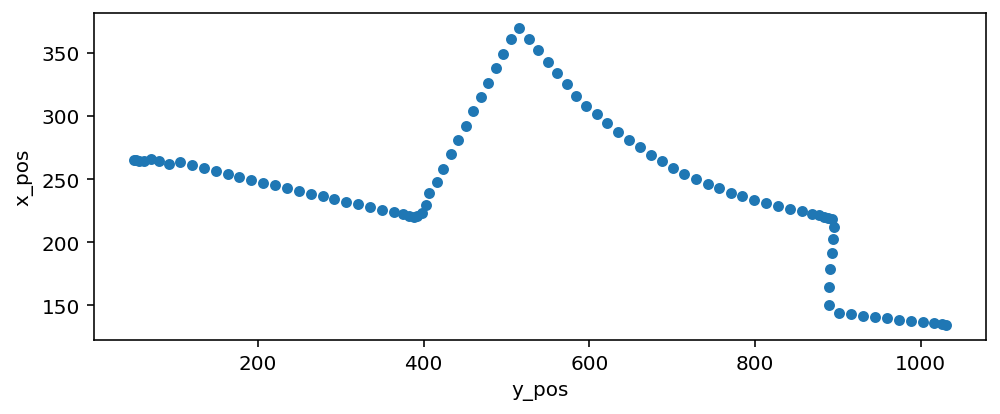

In [90]:
# set the default image resolution and size
plt.rcParams['figure.figsize'] = [8.0, 3.0]
plt.rcParams['figure.dpi'] = 144
# create a scatter plot
tmp.plot.scatter('y_pos', 'x_pos')
plt.show()

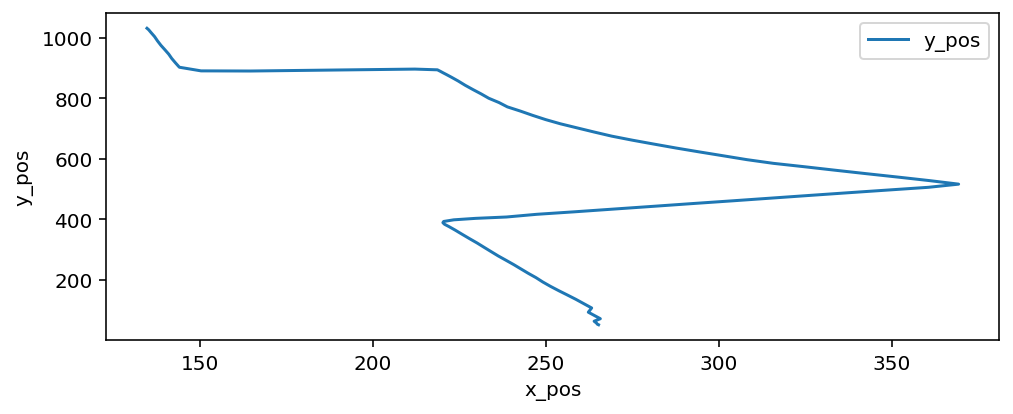

In [96]:
tmp.plot.line('x_pos', 'y_pos')
plt.ylabel('y_pos')
plt.show()

Luckily, read_csv() allows us to specify conversion functions for each column. So, armed with the following two short functions:

In [120]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

In [121]:
routing = pd.read_csv('Sample_data_01.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

In [122]:
vectors = routing[routing.type=='vector']
len(vectors)

51

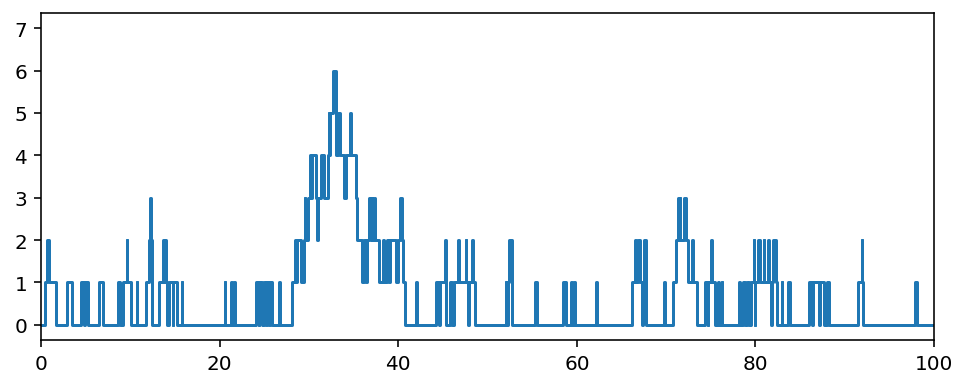

In [123]:
vec = vectors[vectors.name == 'qlen:vector'].iloc[4]  # take some vector a print it
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xlim(0,100)
plt.show()

# Several vectors on the same plot

When several vectors need to be placed on the same plot, one can simply use a for loop.

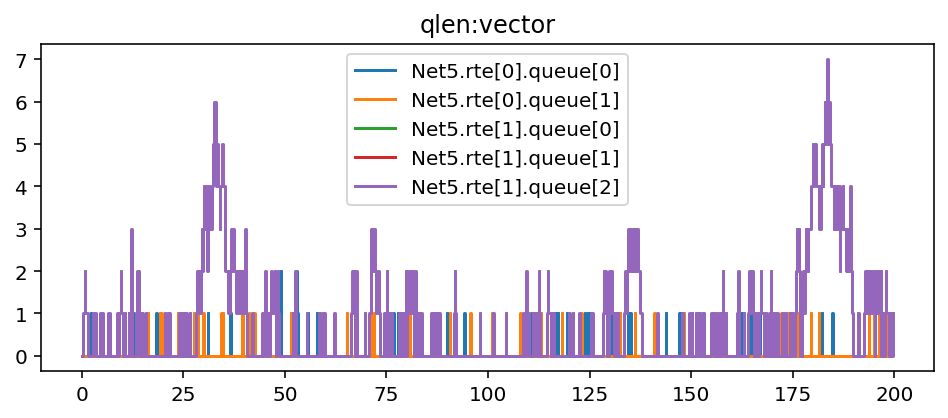

In [125]:
somevectors = vectors[vectors.name == 'qlen:vector'][:5]
for row in somevectors.itertuples(): # we can use a for loop to iterate over vector
    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')
plt.title(somevectors.name.values[0])
plt.legend(somevectors.module)
plt.show()

In [126]:
x = np.array([8, 2, 1, 5, 7])
np.cumsum(x)

array([ 8, 10, 11, 16, 23])

# Plotting cumulative sum against time

Plotting cumulative sum against time might be useful e.g. for an output vector where the simulation emits the packet length for each packet that has arrived at its destination. There, the sum would represent "total bytes received".

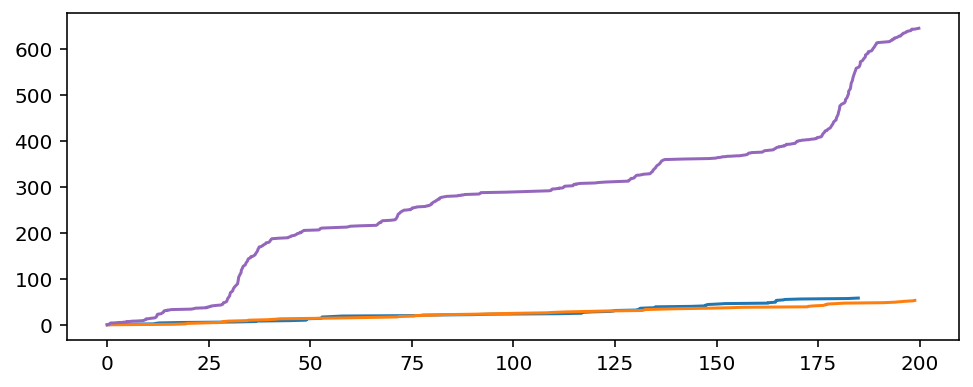

In [127]:
for row in somevectors.itertuples():
    plt.plot(row.vectime, np.cumsum(row.vecvalue))
plt.show()

Plotting the count against time for the same output vector would represent "number of packets received". For such a plot, we can utilize np.arange(1,n) which simply returns the numbers 1, 2, .., n-1 as an array:

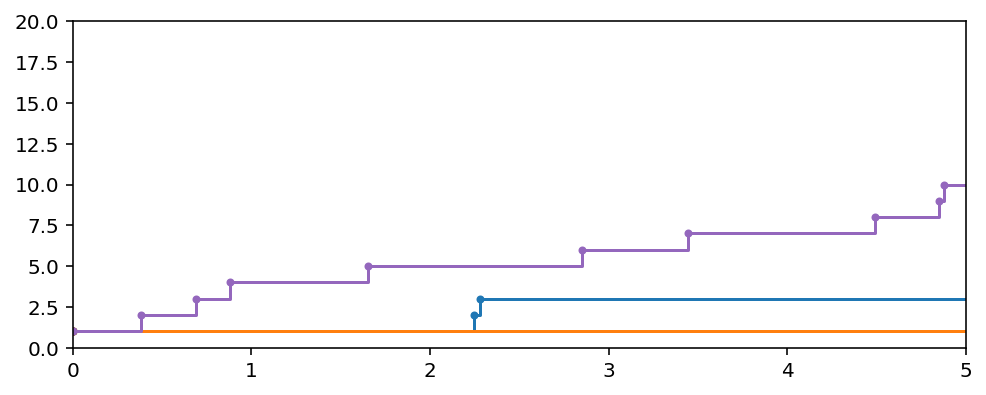

In [135]:
for row in somevectors.itertuples():
    plt.plot(row.vectime, np.arange(1, row.vecvalue.size+1), '.-', drawstyle='steps-post')
plt.xlim(0,5); plt.ylim(0,20)
plt.show()

Note that we changed the plotting style to "steps-post", so that for any t time the plot accurately represents the number of values whose timestamp is less than or equal to t.

As another warm-up exercise, let's plot the time interval that elapses between adjacent values; that is, for each element we want to plot the time difference between the that element and the previous one. This can be achieved by computing t[1:] - t[:-1], which is the elementwise subtraction of the t array and its shifted version. Array indexing starts at 0, so t[1:] means "drop the first element". Negative indices count from the end of the array, so t[:-1] means "without the last element". The latter is necessary because the sizes of the two arrays must match. or convenience, we encapsulate the formula into a Python function:



In [129]:
def diff(t):
    return t[1:] - t[:-1]

# example
t = np.array([0.1, 1.5, 1.6, 2.0, 3.1])
diff(t)

array([1.4, 0.1, 0.4, 1.1])

We can now plot it. Note that as diff() makes the array one element shorter, we need to write row.vectime[1:] to drop the first element (it has no preceding element, so diff() cannot be computed for it.) Also, we use dots for plotting instead of lines, as it makes more sense here.

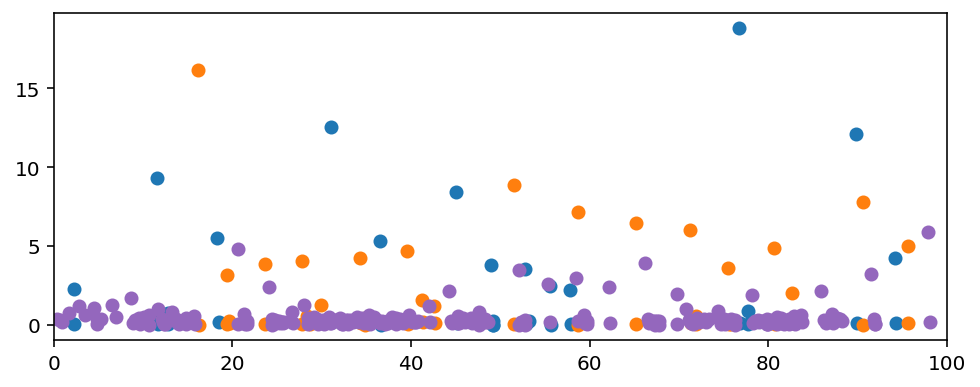

In [130]:
for row in somevectors.itertuples():
    plt.plot(row.vectime[1:], diff(row.vectime), 'o')
plt.xlim(0,100)
plt.show()

We now know enough NumPy to be able to write a function that computes running average (a.k.a. "mean filter"). Let's try it out in a plot immediately.


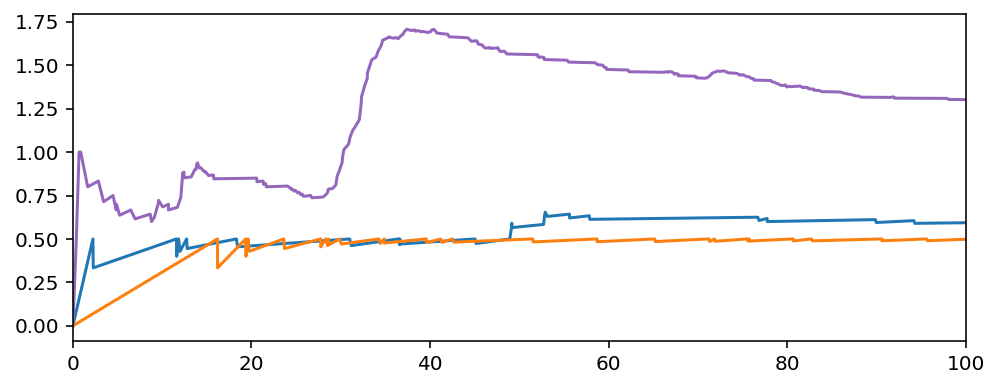

In [131]:
def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

# example plot:
for row in somevectors.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,100)
plt.show()

For certain quantities such as queue length or on-off status, weighted average (with time intervals used as weights) makes more sense. Here is a function that computes running time-average:

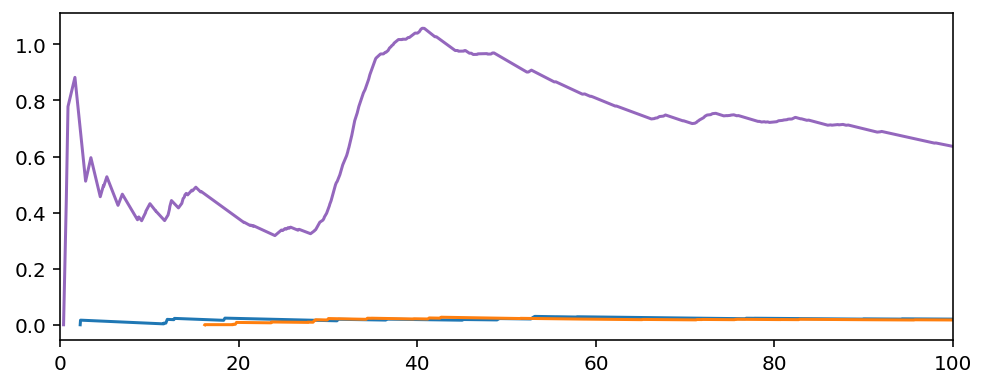

In [132]:
def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt) / t[1:]

# example plot:
for row in somevectors.itertuples():
    plt.plot(row.vectime[1:], running_timeavg(row.vectime, row.vecvalue))
plt.xlim(0,100)
plt.show()

Computing the integral of the vector as a step function is very similar to the running_timeavg() function. (Note: Computing integral in other ways is part of NumPy and SciPy, if you ever need it. For example, np.trapz(y,x) computes integral using the trapezoidal rule.)

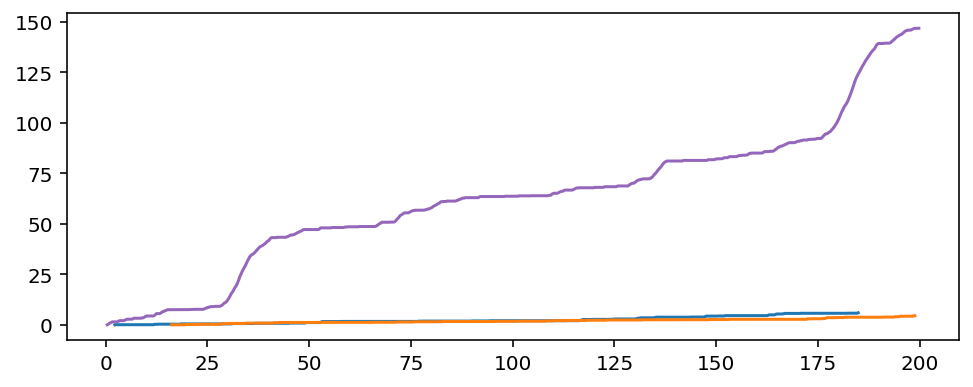

In [133]:
def integrate_steps(t,x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt)

# example plot:
for row in somevectors.itertuples():
    plt.plot(row.vectime[1:], integrate_steps(row.vectime, row.vecvalue))
plt.show()

As the last example in this section, here is a function that computes moving window average. It relies on the clever trick of subtracting the cumulative sum of the original vector from its shifted version to get the sum of values in every N-sized window.

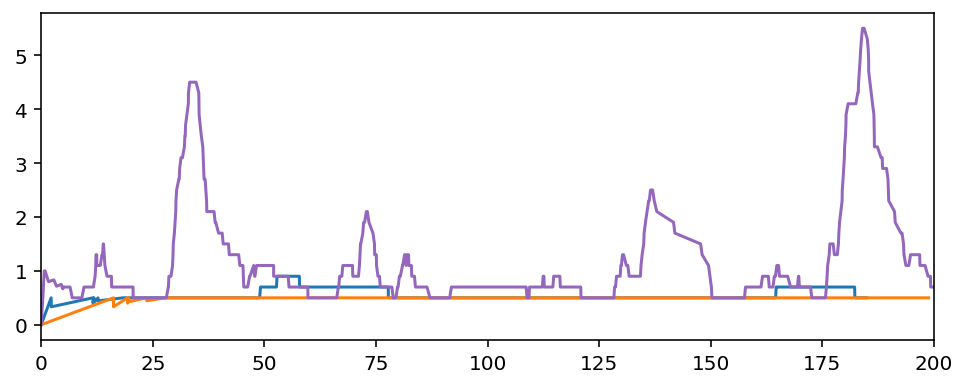

In [134]:
def winavg(x, N):
    xpad = np.concatenate((np.zeros(N), x)) # pad with zeroes
    s = np.cumsum(xpad)
    ss = s[N:] - s[:-N]
    ss[N-1:] /= N
    ss[:N-1] /= np.arange(1, min(N-1,ss.size)+1)
    return ss

# example:
for row in somevectors.itertuples():
    plt.plot(row.vectime, winavg(row.vecvalue, 10))
plt.xlim(0,200)
plt.show()

You can find further hints for smoothing the plot of an output vector in the signal processing chapter of the SciPy Cookbook (see References).

# Resources

The primary and authentic source of information on Pandas, Matplotlib and other libraries is their official documentation. I do not link them here because they are trivial to find via Google. Instead, here is a random collection of other resources that I found useful while writing this tutorial (not counting all the StackOverflow pages I visited.)

- Pandas tutorial from Greg Reda: http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

- On reshaping data frames: https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping

- Matplotlib tutorial of Nicolas P. Rougier: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

- Creating boxplots with Matplotlib, from Bharat Bhole: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/


- SciPy Cookbook on signal smoothing: http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html

- Visual Guide on Pandas (video): https://www.youtube.com/watch?v=9d5-Ti6onew

- Python Pandas Cookbook (videos): https://www.youtube.com/playlist?list=PLyBBc46Y6aAz54aOUgKXXyTcEmpMisAq3